In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = r'individual_stocks_5yr'
company_list = ["AAPL_data.csv", 'GOOG_data.csv', 'MSFT_data.csv', 'AMZN_data.csv']
all_data = pd.DataFrame()
for file in company_list:
    current_df = pd.read_csv(path+'/'+file)
    all_data = pd.concat([all_data, current_df])
all_data.shape

(4752, 7)

# Analyce closing price of stocks & trading volume

In [4]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [5]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [6]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [7]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [8]:
tech_list = all_data['Name'].unique()

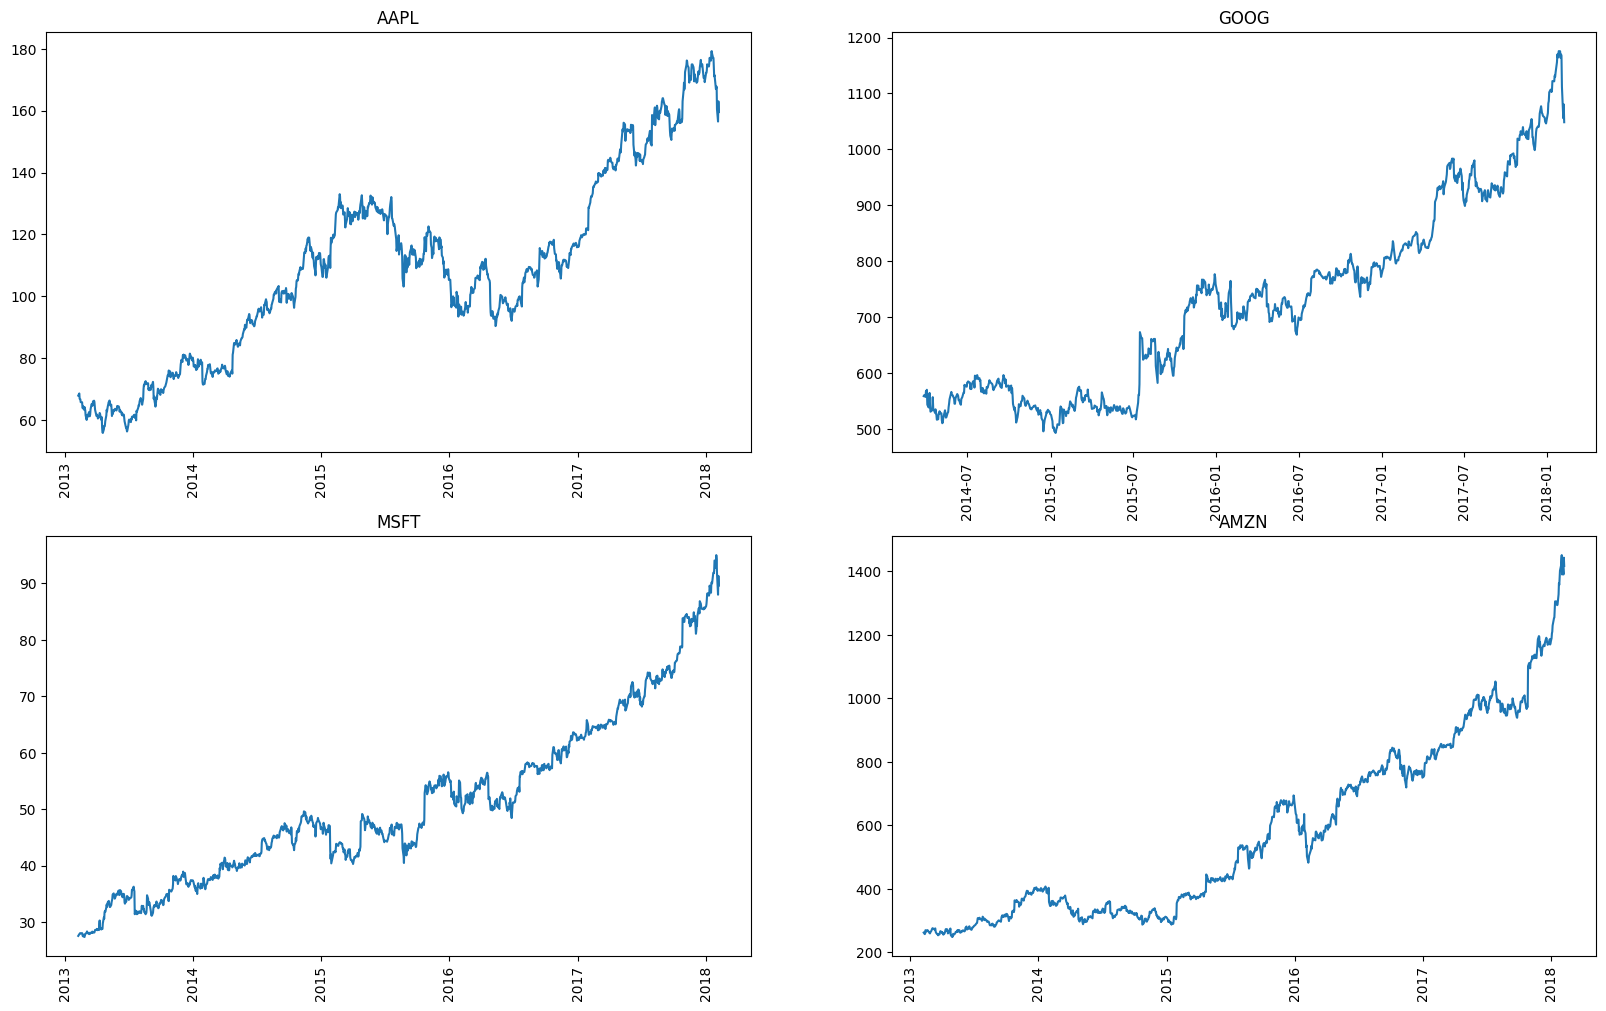

In [9]:
plt.figure(figsize=(20,12))
for i, company in enumerate(tech_list, 1):
    plt.subplot(2,2,i)
    df = all_data[all_data['Name'] == company]
    plt.plot(df['date'], df['close'])
    plt.xticks(rotation = 'vertical')
    plt.title(company)

In [10]:
import plotly.express as px

In [11]:
for company in tech_list:
    df = all_data[all_data['Name'] == company]
    fig = px.line(df, x = 'date', y = 'volume', title = company)
    fig.show()

# Analyce Daily and Monthly Return

In [13]:
df = pd.read_csv(r'individual_stocks_5yr/AAPL_data.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [14]:
df['Daily_Price_change'] = df['close'] - df['open']

In [15]:
df.head()

,date,open,high,low,close,volume,Name,Daily_Price_change
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957


In [16]:
df['1day % return'] = ((df['close'] - df['open']) / df['close']) * 100

In [17]:
df.head()

,date,open,high,low,close,volume,Name,Daily_Price_change,1day % return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [19]:
fig = px.line(df, x = 'date', y = '1day % return', title = company)
fig.show()

In [20]:
df2 = df.copy()

In [21]:
df2.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
Daily_Price_change    float64
1day % return         float64
dtype: object

In [22]:
df2['date'] = pd.to_datetime(df2['date'])

In [23]:
df2.set_index('date', inplace = True)

In [24]:
df2.head()

,open,high,low,close,volume,Name,Daily_Price_change,1day % return
date,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


<AxesSubplot: xlabel='date'>

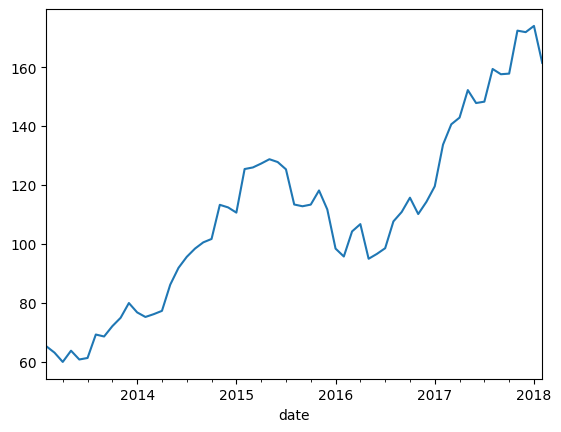

In [32]:
df2['close'].resample('M').mean().plot()

<AxesSubplot: xlabel='date'>

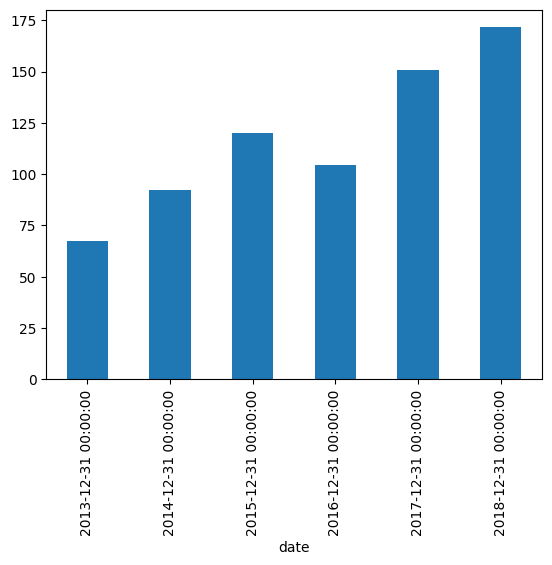

In [33]:
df2['close'].resample('Y').mean().plot(kind = 'bar')

# Correlation between this tech companies

In [35]:
aapl = pd.read_csv(r'individual_stocks_5yr/AAPL_data.csv')
aapl.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [36]:
amzn = pd.read_csv(r'individual_stocks_5yr/AMZN_data.csv')
amzn.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [37]:
msft = pd.read_csv(r'individual_stocks_5yr/MSFT_data.csv')
msft.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [38]:
goog = pd.read_csv(r'individual_stocks_5yr/GOOG_data.csv')
goog.head()

,date,open,high,low,close,volume,Name
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG


In [39]:
close = pd.DataFrame()

In [49]:
close['aapl'] = aapl['close']
close['goog'] = goog['close']
close['amzn'] = amzn['close']
close['msft'] = msft['close']


In [50]:
close.head()

,aapl,amzn,msft,goog
0,67.8542,261.95,27.55,558.46
1,68.5614,257.21,27.86,559.99
2,66.8428,258.70,27.88,556.97
3,66.7156,269.47,28.03,567.16
4,66.6556,269.24,28.04,567.00


In [51]:
import seaborn as sns

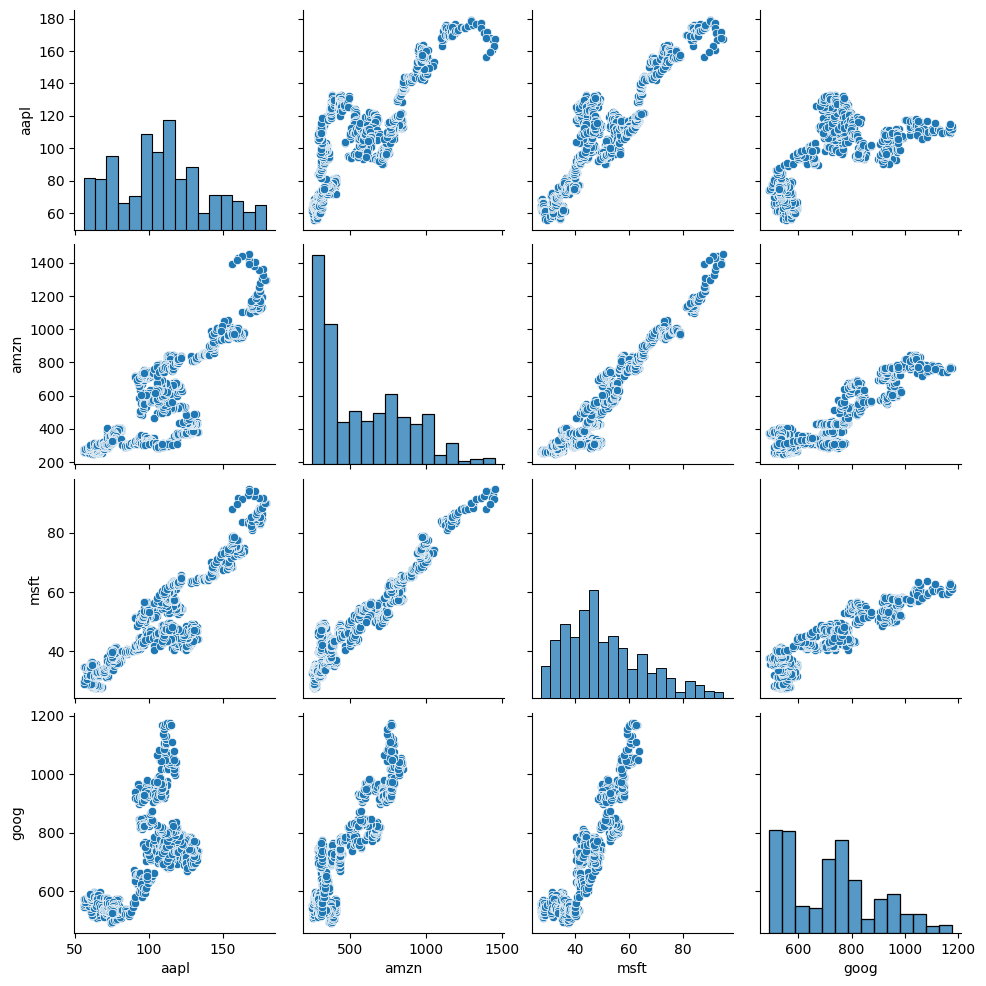

In [52]:
sns.pairplot(data=close)

<AxesSubplot: >

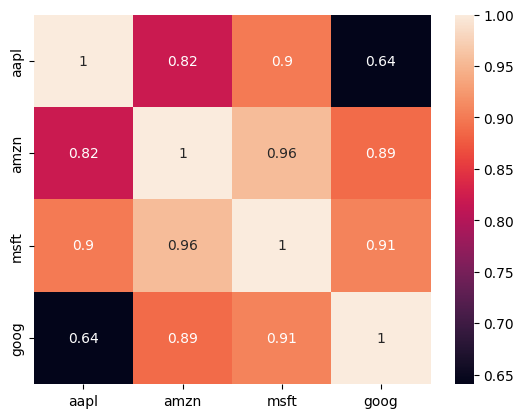

In [53]:
sns.heatmap(close.corr(), annot = True)

# How the daily returns of each stock are correlated?

In [54]:
aapl.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [55]:
data = pd.DataFrame()

In [56]:
data['aapl_change'] = ((aapl['close'] - aapl['open']) / aapl['close']) * 100
data['goog_change'] = ((goog['close'] - goog['open']) / goog['close']) * 100
data['amzn_change'] = ((amzn['close'] - amzn['open']) / amzn['close']) * 100
data['msft_change'] = ((msft['close'] - msft['open']) / msft['close']) * 100

In [57]:
data.head()

,aapl_change,goog_change,amzn_change,msft_change
0,0.206325,-1.708269,0.209964,0.725953
1,0.714688,-0.216075,-2.328836,0.753769
2,-2.481344,-1.781065,-0.189409,0.000000
3,-0.042869,1.489879,2.946525,0.356761
4,0.443624,0.334039,0.694548,0.427960


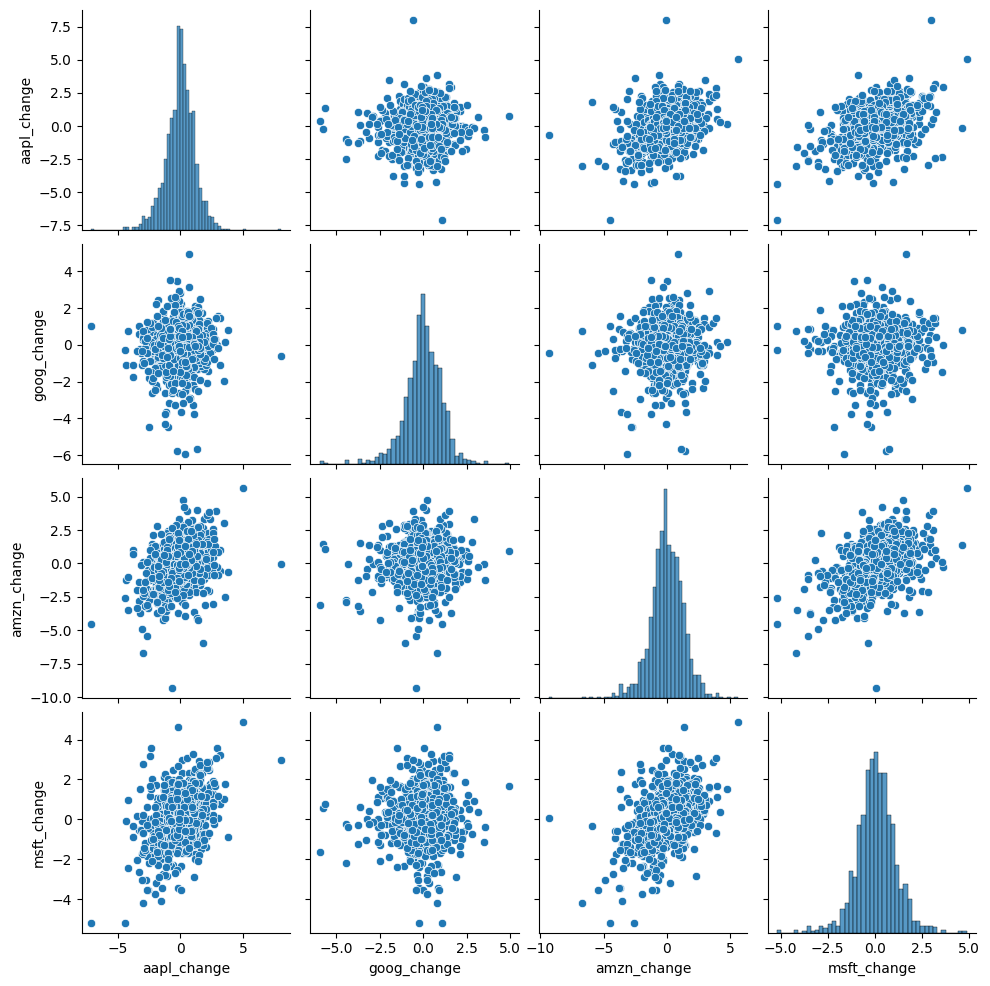

In [58]:
sns.pairplot(data = data)

<AxesSubplot: >

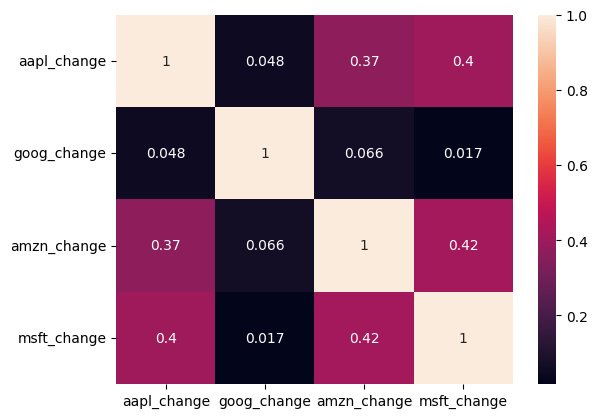

In [59]:
sns.heatmap(data.corr(), annot = True)

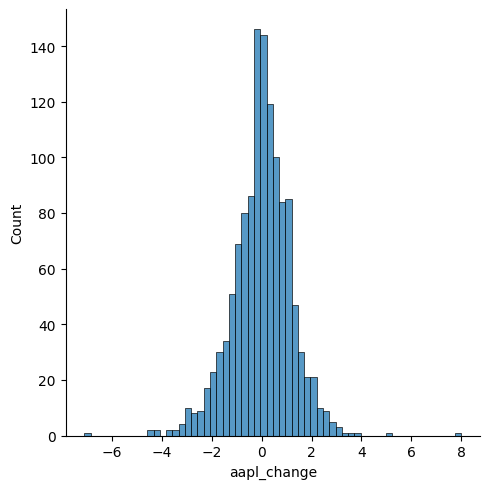

In [62]:
sns.displot(data['aapl_change'])

In [63]:
data['aapl_change'].std()
### 68% of entire data

1.1871377131421237

In [70]:
data['aapl_change'].quantile(0.1)

-1.4246644227944307

In [71]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
aapl_change,1259.0,-0.000215,1.187138,-7.104299,-0.658021,0.042230,0.715427,8.000388
goog_change,975.0,-0.012495,1.092560,-5.952266,-0.551963,0.024951,0.672649,4.943550
amzn_change,1259.0,-0.000398,1.358679,-9.363077,-0.738341,-0.002623,0.852568,5.640265
msft_change,1259.0,0.076404,1.059260,-5.177618,-0.509241,0.061069,0.703264,4.861491
